**Notebook by: Maria J. Molina (NCAR)**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from config import path

In [2]:
def redo_columns(df):
    """
    Removing year label in column names.
    
    Args:
        df: pandas dataframe
    """
    clean_cols = []

    for co in df.columns:
        if '_f.' in co:
            clean_cols.append(co.split('_f.')[1])
        elif '_f_RV.' in co:
            clean_cols.append(co.split('_f_RV.')[1])
        elif '_F.' in co:
            clean_cols.append(co.split('_F.')[1])
        elif '_F_RV.' in co:
            clean_cols.append(co.split('_F_RV.')[1])
        elif '_IS.' in co:
            clean_cols.append(co.split('_IS.')[1])
        elif '_IS_RV.' in co:
            clean_cols.append(co.split('_IS_RV.')[1])
        else:
            clean_cols.append(co)
            
    return clean_cols

def redo_staff_category(df):
    """
    Changing name of staff column to one consistent name.
    
    Args:
        df: pandas dataframe
    """
    rename = []

    for i in df['Instructional staff category']: 
        
        if 'Instruction/research/public service, ' in i:
            rename.append(i.split('Instruction/research/public service, ')[1].lower())
            
        elif 'Instruction/research/public servicey, ' in i:
            rename.append(i.split('Instruction/research/public servicey, ')[1].lower())
            
        else:
            rename.append(i.lower())
            
    df['Instructional staff category']=rename
    
    return df

def synthesize_staff_categories(df):
    """
    Changing staff categories to consistent naming due to 2000 versus 2010 changes.
    
    Args:
        df: pandas dataframe
    """
    rename_staff_positions = {
            'tenured total':                                           'tenured total', 
            'tenured, professors':                                     'tenured, professors',
            'tenured, instructors':                                    'tenured, instructors',
            'tenured, associate professors':                           'tenured, associate professors',
            'tenured, assistant professors':                           'tenured, assistant professors',
            'tenured, lecturers':                                      'tenured, lecturers',
            'tenured, no academic rank':                               'tenured, no academic rank', 
            'non-tenured on tenure track, professors':                 'on-tenure track, professors',
            'non-tenured on tenure track, associate professors':       'on-tenure track, associate professors',
            'non-tenured on tenure track, assistant professors':       'on-tenure track, assistant professors',
            'non-tenured on tenure track, instructors':                'on-tenure track, instructors', 
            'non-tenured on tenure track total':                       'on-tenure track total',
            'non-tenured on tenure track, lecturers':                  'on-tenure track, lecturers',
            'non-tenured on tenure track, no academic rank':           'on-tenure track, no academic rank',
            'non-tenured not on tenure track total':                   'not on tenure track/no tenure system system total',
            'non-tenured not on tenure track, professors':             'not on tenure/no tenure system, professors',
            'non-tenured not on tenure track, lecturers':              'not on tenure/no tenure system, lecturers',
            'non-tenured not on tenure track, associate professors':   'not on tenure/no tenure system, associate professors',
            'non-tenured not on tenure track, assistant professors':   'not on tenure/no tenure system, assistant professors',
            'non-tenured not on tenure track, instructors':            'not on tenure/no tenure system, instructors',
            'non-tenured not on tenure track, no academic rank':       'not on tenure/no tenure system, no academic rank',}
    
    df['Instructional staff category'] = [rename_staff_positions[i] for i in df['Instructional staff category']]
    
    return df

def preprocess(filename):
    """
    Preprocessing of dataframes.
    
    Args:
        filename: string of filename
    """
    df = pd.read_csv(filename)

    # dropping due to inconsistent naming/columns
    df = df[df.columns.drop(list(df.filter(regex='Asian')))]
    df = df[df.columns.drop(list(df.filter(regex='Pacific')))]
    df = df[df.columns.drop(list(df.filter(regex='distance')))]
    df = df[df.columns.drop(list(df.filter(regex='IDX_HR')))]
    df = df[df.columns.drop(list(df.filter(regex='unitid')))]
    df = df[df.columns.drop(list(df.filter(regex='- new')))]
    df = df[df.columns.drop(list(df.filter(regex='- old')))]
    
    df.columns = redo_columns(df)
    
    year = df['year'].iloc[0].astype(str)
    
    # renaming columns due to changes in classifications
    if year == '2009' or year == '2010' or year == '2011':
        
        df = df.rename(columns=
                  {"American Indian or Alaska Native total - derived": "American Indian or Alaska Native total",
                   "American Indian or Alaska Native men - derived": "American Indian or Alaska Native men",
                   "American Indian or Alaska Native women - derived": "American Indian or Alaska Native women",
                   "Black or African American/Black non-Hispanic total - derived": "Black or African American total",
                   "Black or African American/Black non-Hispanic men - derived": "Black or African American men",
                   "Black or African American/Black non-Hispanic women - derived": "Black or African American women",
                   "Hispanic or Latino/Hispanic total - derived": "Hispanic or Latino total",
                   "Hispanic or Latino/Hispanic men - derived":   "Hispanic or Latino men",
                   "Hispanic or Latino/Hispanic women - derived": "Hispanic or Latino women",
                   "White/White non-Hispanic total - derived":    "White total",
                   "White/White non-Hispanic men - derived":      "White men",
                   "White/White non-Hispanic women - derived":    "White women",
                   "Tenure status and academic rank of full-time instruction/research/public service staff":"Instructional staff category",
                           })
        
    df = redo_staff_category(df)
    
    if year == '2009' or year == '2010' or year == '2011':
        
        df = synthesize_staff_categories(df)
    
    return df, year

def open_and_concat(filelist):
    """
    Open and concatenate the files.
    
    Args:
        filelist: list of filename strings
    """
    df0 , year0  = preprocess(filelist[0])   # 2009
    df1 , year1  = preprocess(filelist[1])
    df2 , year2  = preprocess(filelist[2])
    df3 , year3  = preprocess(filelist[3])
    df4 , year4  = preprocess(filelist[4])
    df5 , year5  = preprocess(filelist[5])
    df6 , year6  = preprocess(filelist[6])
    df7 , year7  = preprocess(filelist[7])
    df8 , year8  = preprocess(filelist[8])
    df9 , year9  = preprocess(filelist[9])
    df10, year10 = preprocess(filelist[10])  # 2019
    
    df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], 
                   keys=[year0, year1, year2, year3, year4, 
                         year5, year6, year7, year8, year9, year10], 
                   sort=False)
    
    return df

In [45]:
def diff(df1, df2, col_name):
    """
    Difference between two dataframe columns.
    
    Args:
        df1: dataframe
        df2: dataframe
        col_name: name of column difference
    """
    temp = pd.DataFrame(df1 - df2)
    temp.columns = [col_name]
    
    return temp

In [9]:
def different_tracks(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'tenured total') |
                  (df['Instructional staff category'] == 'on-tenure track total') |
                  (df['Instructional staff category'] == 'not on tenure track/no tenure system system total')]

def tenured_positions(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'tenured, professors') |
                  (df['Instructional staff category'] == 'tenured, associate professors') |
                  (df['Instructional staff category'] == 'tenured, assistant professors') |
                  (df['Instructional staff category'] == 'tenured, instructors') |
                  (df['Instructional staff category'] == 'tenured, lecturers') |
                  (df['Instructional staff category'] == 'tenured, no academic rank')]

def ontenuretrack_positions(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'on-tenure track, professors') |
                  (df['Instructional staff category'] == 'on-tenure track, associate professors') |
                  (df['Instructional staff category'] == 'on-tenure track, assistant professors') |
                  (df['Instructional staff category'] == 'on-tenure track, instructors') |
                  (df['Instructional staff category'] == 'on-tenure track, lecturers') |
                  (df['Instructional staff category'] == 'on-tenure track, no academic rank')]

def notenure_positions(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'not on tenure/no tenure system, professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, associate professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, assistant professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, instructors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, lecturers') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, no academic rank')]

def full_professor(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'tenured, professors') |
                  (df['Instructional staff category'] == 'on-tenure track, professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, professors')]

def associate_professor(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'tenured, associate professors') |
                  (df['Instructional staff category'] == 'on-tenure track, associate professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, associate professors')]

def assistant_professor(df):
    """
    Filter physical sciences degree programs.
    """
    return df.loc[(df['Instructional staff category'] == 'tenured, assistant professors') |
                  (df['Instructional staff category'] == 'on-tenure track, assistant professors') |
                  (df['Instructional staff category'] == 'not on tenure/no tenure system, assistant professors')]

### Columns

- institution name
- year
- Instructional staff category
- Grand total
- Grand total men
- Grand total women
- American Indian or Alaska Native total
- American Indian or Alaska Native men
- American Indian or Alaska Native women
- Black or African American total
- Black or African American men
- Black or African American women
- Hispanic or Latino total
- Hispanic or Latino men
- Hispanic or Latino women
- White total
- White men
- White women
- Race/ethnicity unknown total
- Race/ethnicity unknown men
- Race/ethnicity unknown women
- Nonresident alien total
- Nonresident alien men
- Nonresident alien women
- Two or more races total
- Two or more races men
- Two or more races women

### Instructional staff category

- tenured, professors 
- tenured, associate professors
- tenured, assistant professors
- tenured, instructors
- tenured total
- on-tenure track, professors
- on-tenure track, associate professors
- on-tenure track, assistant professors
- on-tenure track, instructors
- on-tenure track total
- not on tenure/no tenure system, associate professors
- not on tenure/no tenure system, assistant professors
- not on tenure/no tenure system, instructors
- not on tenure track/no tenure system system total
- not on tenure/no tenure system, professors
- not on tenure/no tenure system, lecturers
- not on tenure/no tenure system, no academic rank
- tenured, no academic rank
- tenured, lecturers
- on-tenure track, lecturers
- on-tenure track, no academic rank

In [10]:
all_files = glob.glob(path + "/Staff/staff_*.csv")
all_files = sorted(all_files)

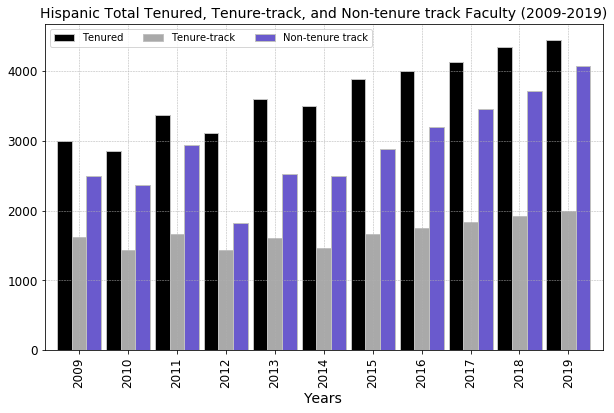

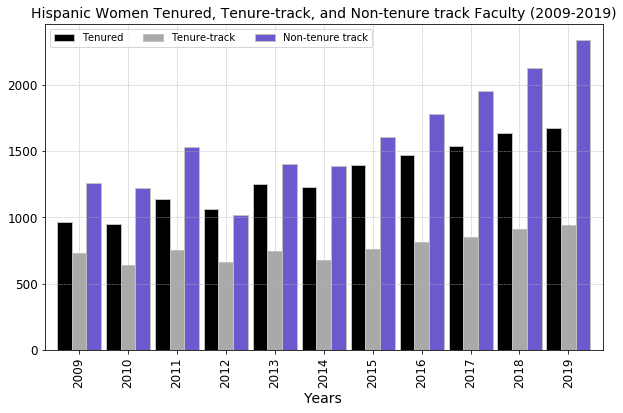

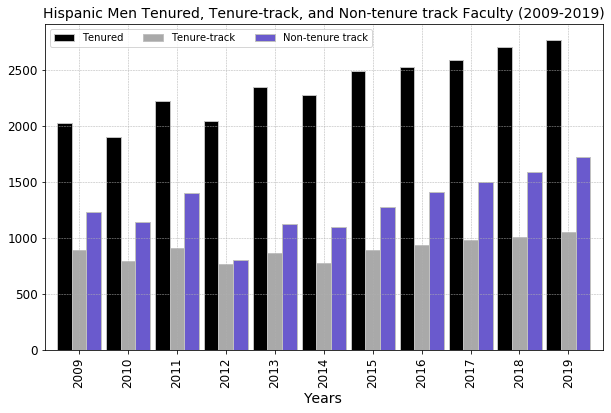

In [52]:
# ---

df = open_and_concat(all_files)
df = different_tracks(df)   # totals

# ---

df_T_hisptotal  = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino total']

df_T_hispwomen = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino women']

df_T_hispmen = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino men']

# ---

df_TT_hisptotal  = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino total']

df_TT_hispwomen = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino women']

df_TT_hispmen = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino men']

# ---

df_noTT_hisptotal  = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino total']

df_noTT_hispwomen = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino women']

df_noTT_hispmen = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino men']

# ----

pd.concat([df_T_hisptotal, df_TT_hisptotal, df_noTT_hisptotal], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Hispanic Total Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_T_hispwomen, df_TT_hispwomen, df_noTT_hispwomen], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Hispanic Women Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_T_hispmen, df_TT_hispmen, df_noTT_hispmen], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Hispanic Men Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

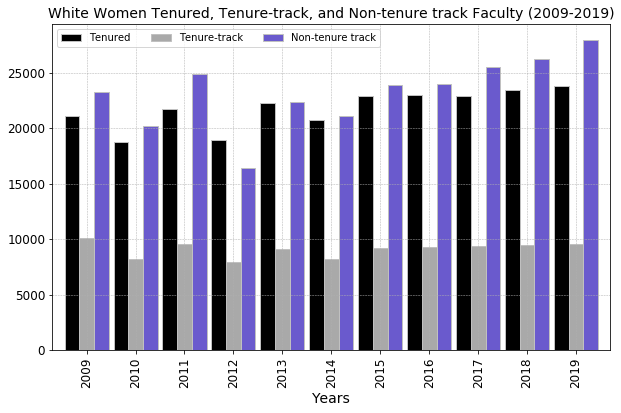

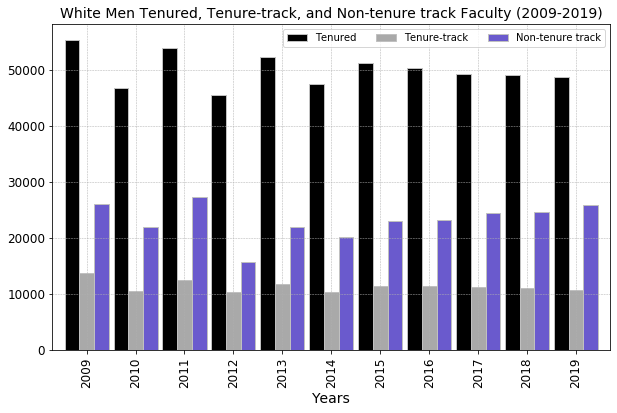

In [57]:
# ---

df = open_and_concat(all_files)
df = different_tracks(df)

# ---

df_T_women = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['White women']

df_T_men = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['White men']

# ---

df_TT_women = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['White women']

df_TT_men = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['White men']

# ---

df_noTT_women = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['White women']

df_noTT_men = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['White men']

# ----

pd.concat([df_T_women, df_TT_women, df_noTT_women], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('White Women Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_T_men, df_TT_men, df_noTT_men], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper right', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('White Men Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

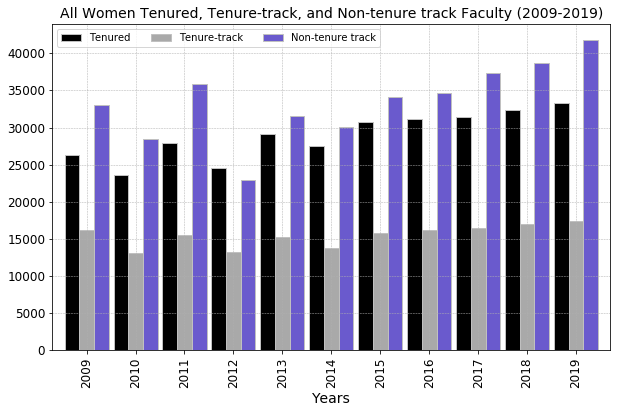

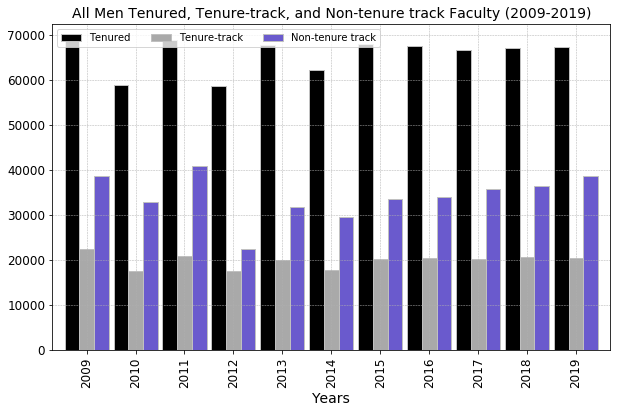

In [58]:
# ---

df = open_and_concat(all_files)
df = different_tracks(df)

# ---

df_T_women = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Grand total women']

df_T_men = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Grand total men']

# ---

df_TT_women = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Grand total women']

df_TT_men = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Grand total men']

# ---

df_noTT_women = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Grand total women']

df_noTT_men = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Grand total men']

# ----

pd.concat([df_T_women, df_TT_women, df_noTT_women], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('All Women Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_T_men, df_TT_men, df_noTT_men], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('All Men Tenured, Tenure-track, and Non-tenure track Faculty (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

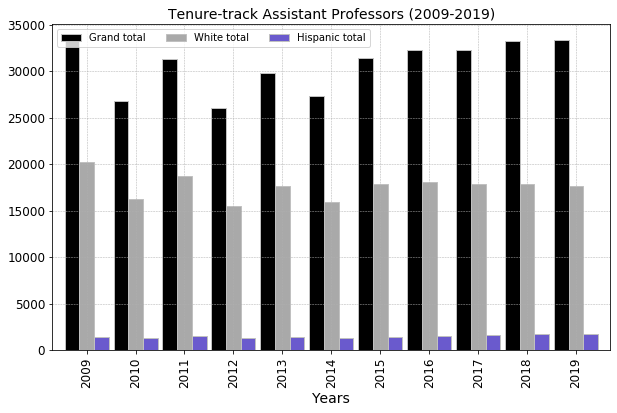

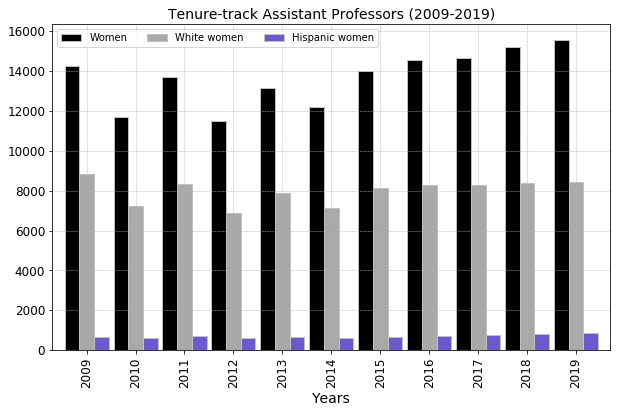

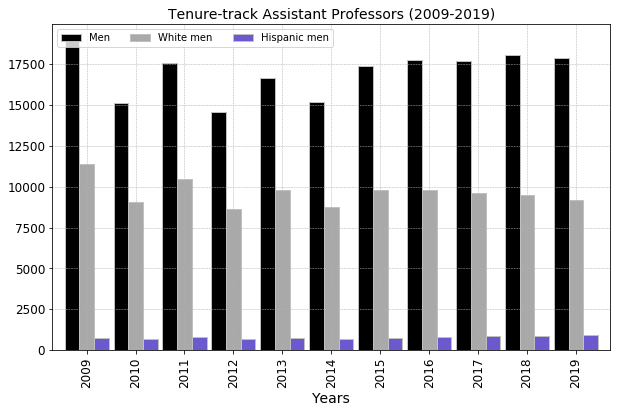

In [66]:
# ---

df = open_and_concat(all_files)

# ---  totals

df_asstprof_total = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Grand total']

df_asstprof_whitetotal = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['White total']

df_asstprof_hisptotal = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Hispanic or Latino total']

# ----  women

df_asstprof_women = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Grand total women']

df_asstprof_whitewomen = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['White women']

df_asstprof_hispwomen = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Hispanic or Latino women']

# ----  men

df_asstprof_men = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Grand total men']

df_asstprof_whitemen = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['White men']

df_asstprof_hispmen = df.loc[(df['Instructional staff category'] == 'on-tenure track, assistant professors')].groupby(
                    'year').sum()['Hispanic or Latino men']

# ----

pd.concat([df_asstprof_total, df_asstprof_whitetotal, df_asstprof_hisptotal], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Grand total', 'White total', 'Hispanic total'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Tenure-track Assistant Professors (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_asstprof_women, df_asstprof_whitewomen, df_asstprof_hispwomen], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Women', 'White women', 'Hispanic women'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Tenure-track Assistant Professors (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----

pd.concat([df_asstprof_men, df_asstprof_whitemen, df_asstprof_hispmen], axis=1).plot.bar(
                                    figsize=(10,6), subplots=False, label='', width=0.9,
                                    color=['k','darkgrey','slateblue'], 
                                    edgecolor='silver')

plt.legend(['Men', 'White men', 'Hispanic men'],loc='upper left', ncol=3)
plt.xlabel('Years', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], 
           [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 
           fontsize=12)

plt.yticks(fontsize=12)
#plt.ylim([0,25000])
plt.title('Tenure-track Assistant Professors (2009-2019)', fontsize=14)
plt.grid('0.15', ls='--', lw=0.5)
#plt.savefig('../figures/bars_chala.png', bbox_inches='tight', dpi=200)
plt.show()

# ----